## Need to set up a notebook dependencies check section

In [14]:
try:
    setup_gcgs_dependencies_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.")
    print("+++++++++++++++++++++++++++++++")

+++++++++++++++++++++++++++++++
[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.
+++++++++++++++++++++++++++++++


## Import Libraries

In [15]:
import numpy as np
import pandas as pd

## Model code

In [16]:
!aws s3 cp 's3://my-508-projects/eng_mlcsv/eng_mlcsv.csv' ./data_model/

download: s3://my-508-projects/eng_mlcsv/eng_mlcsv.csv to data_model/eng_mlcsv.csv


In [17]:
import csv
ml = pd.read_csv(
    r"./data_model/eng_mlcsv.csv",
    engine = 'python',
    dtype={'NDC5_4':str}  # Must encode NDC with leading 0s as 'str'
)
ml.shape

(94453, 19)

In [18]:
ml.dtypes

DESYNPUF_ID            object
NDC5_4                 object
ptnt_pay_amt            int64
total_cost              int64
cost_per_day          float64
proprietaryname        object
nonproprietaryname     object
isgeneric             float64
TOT_RX_CST_AMT          int64
SP_STATE_CODE           int64
year                    int64
bene_sex_ident_cd       int64
bene_race_cd            int64
age_code                int64
esrd                    int64
region_code             int64
cont_enroll             int64
ccnum                   int64
high_ben                int64
dtype: object

In [19]:
ml.head(5)

,DESYNPUF_ID,NDC5_4,ptnt_pay_amt,total_cost,cost_per_day,proprietaryname,nonproprietaryname,isgeneric,TOT_RX_CST_AMT,SP_STATE_CODE,year,bene_sex_ident_cd,bene_race_cd,age_code,esrd,region_code,cont_enroll,ccnum,high_ben
0,254DE5244C61F075,675440700,0,30,1.500000,loperamide hydrochloride,loperamide hydrochloride,1.0,30,10,2010,2,1,1,0,1,0,0,0
1,254DE5244C61F075,675440700,0,30,1.500000,loperamide hydrochloride,loperamide hydrochloride,1.0,30,10,2008,2,1,1,0,1,0,0,0
2,3FFDCD071F4F1AA4,000937350,0,170,5.666666,lansoprazole,lansoprazole,1.0,170,33,2009,2,1,4,0,3,0,0,1
3,3FFDCD071F4F1AA4,000937350,0,170,5.666666,lansoprazole,lansoprazole,1.0,170,33,2008,2,1,4,0,3,0,0,1
4,3FFDCD071F4F1AA4,000937350,0,170,5.666666,lansoprazole,lansoprazole,1.0,170,33,2010,2,1,4,0,3,0,0,1


Text(0, 0.5, 'Generic Count')

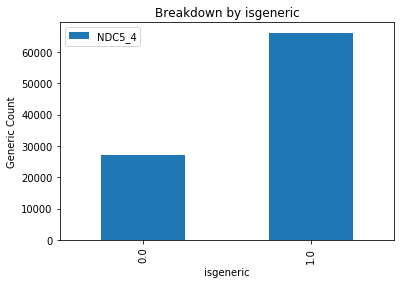

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline
#%config InlineBackend.figure_format='retina'

ml[['isgeneric','NDC5_4']].groupby('isgeneric').count().plot(kind="bar", title="Breakdown by isgeneric")
plt.xlabel("isgeneric")
plt.ylabel("Generic Count")